# MNIST Dynamic Filter Classification

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

####[MDF-01]
Import modules and set random seeds.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import initializers
from keras.datasets import mnist

np.random.seed(20190222)
tf.set_random_seed(20190222)

plt.rcParams['axes.facecolor'] = 'snow'

Using TensorFlow backend.


####[MDF-02]
Download the MNIST dataset and store into NumPy arrays.

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

####[MDF-03]
Define a CNN model with a single convolutional filter layer.

In [3]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(layers.Conv2D(16, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling (MaxPooling2D)   (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
hidden (Dense)               (None, 1024)              3212288   
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 3,222,954
Trainable params: 3,222,954
Non-trainable para

####[MDF-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MDF-05]
Train the model. It achieves the 98.9% accuracy.

In [5]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.1668 - acc: 0.9511 - val_loss: 0.0519 - val_acc: 0.9821
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0508 - acc: 0.9843 - val_loss: 0.0469 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0301 - acc: 0.9910 - val_loss: 0.0393 - val_acc: 0.9864
Epoch 4/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0382 - val_acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0145 - acc: 0.9955 - val_loss: 0.0430 - val_acc: 0.9865
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0108 - acc: 0.9963 - val_loss: 0.0402 - val_acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - lo

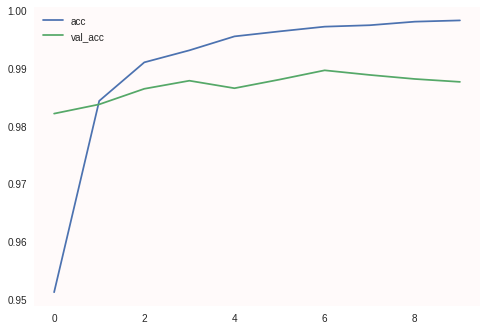

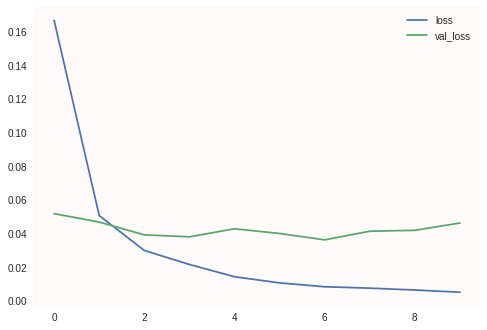

In [6]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot(grid=False)
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot(grid=False)

####[MDF-06]
Mount your Google Drive on `/content/gdrive`.

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


####[MDF-07]
Export the trained model as a file `MNIST_single.hd5` on your Google Drive.

In [8]:
model.save('/content/gdrive/My Drive/MNIST_single.hd5')
!ls -lh '/content/gdrive/My Drive/MNIST_single.hd5'

-rw------- 1 root root 37M Feb 28 07:17 '/content/gdrive/My Drive/MNIST_single.hd5'
